In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os   
import cv2

In [2]:
# Define the path to the train and test folders
train_path = r'C:\Users\tanma\OneDrive\Desktop\staragile\data files\xray_dataset_covid19\train'
test_path = r'C:\Users\tanma\OneDrive\Desktop\staragile\data files\xray_dataset_covid19\test'

# Define the size to which the images will be resized
SIZE = (224, 224)

In [3]:
def read_images(path, size):
    x = []
    y = []

    # Iterate over the subfolders in the path
    for folder_name in os.listdir(path):   
        folder_path = f'{path}/{folder_name}'
        
        # Iterate over the files in the subfolder
        for img_file in os.listdir(folder_path):
            img_file = f'{folder_path}/{img_file}'
            file_ext=img_file.split('.')[-1]
            
            # Check if the file is an image file
            if file_ext in ['jpg', 'jpeg', 'png', 'gif']:
                img_array = cv2.imread(img_file)
                img_array = cv2.resize(img_array, size, interpolation = cv2.INTER_AREA)
                x.append(img_array)
                
                # Assign labels based on the folder name
                if folder_name == 'NORMAL':
                    y.append(1)
                else:
                    y.append(0)

    x = np.array(x)
    y = np.array(y)
    
    return (x, y)

# Read the train images
train_x, train_y = read_images(train_path, SIZE)

# Read the test images
test_x, test_y = read_images(test_path, SIZE)


In [4]:
train_x

array([[[[ 29,  29,  29],
         [ 32,  32,  32],
         [ 32,  32,  32],
         ...,
         [ 34,  34,  34],
         [ 31,  31,  31],
         [ 28,  28,  28]],

        [[ 29,  29,  29],
         [ 32,  32,  32],
         [ 31,  31,  31],
         ...,
         [ 31,  31,  31],
         [ 33,  33,  33],
         [ 29,  29,  29]],

        [[ 28,  28,  28],
         [ 32,  32,  32],
         [ 32,  32,  32],
         ...,
         [ 31,  31,  31],
         [ 32,  32,  32],
         [ 28,  28,  28]],

        ...,

        [[ 26,  26,  26],
         [ 30,  30,  30],
         [ 28,  28,  28],
         ...,
         [ 33,  33,  33],
         [ 33,  33,  33],
         [ 29,  29,  29]],

        [[ 26,  26,  26],
         [ 30,  30,  30],
         [ 29,  29,  29],
         ...,
         [ 33,  33,  33],
         [ 34,  34,  34],
         [ 30,  30,  30]],

        [[ 26,  26,  26],
         [ 30,  30,  30],
         [ 29,  29,  29],
         ...,
         [ 33,  33,  33],
        

In [5]:
len(train_y)

148

In [6]:
train_x.shape, test_x.shape

((148, 224, 224, 3), (40, 224, 224, 3))

In [7]:
train_y.shape, test_y.shape

((148,), (40,))

Text(0.5, 1.0, 'PNEUMONIA')

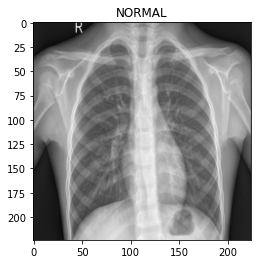

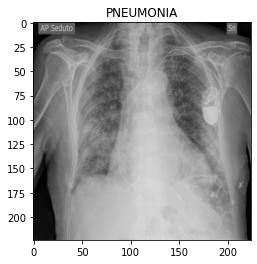

In [8]:
# plotting the image of normal and pneumonia patients 
plt.figure(figsize=(4,4))
plt.imshow(train_x[0])
plt.title('NORMAL')

plt.figure(figsize=(4,4))
plt.imshow(train_x[100])
plt.title('PNEUMONIA')

In [29]:
batch_size = 32
epochs = 15
num_classes = 2

In [10]:
train_y.dtype

dtype('int32')

In [11]:
import keras
#coverting the y data to categorical
train_y= keras.utils.to_categorical(train_y,num_classes)
test_y= keras.utils.to_categorical(test_y,num_classes)

In [12]:
train_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [13]:
train_y.dtype

dtype('float32')

In [14]:
# now to standardise the x data and coverting the data type off the x data to float
train_x= train_x.astype('float32')
test_x= test_x.astype('float32')

train_x= train_x/255
test_x= test_x/255

In [15]:
train_x

array([[[[0.11372549, 0.11372549, 0.11372549],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.13333334, 0.13333334, 0.13333334],
         [0.12156863, 0.12156863, 0.12156863],
         [0.10980392, 0.10980392, 0.10980392]],

        [[0.11372549, 0.11372549, 0.11372549],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.12156863, 0.12156863, 0.12156863],
         [0.12941177, 0.12941177, 0.12941177],
         [0.11372549, 0.11372549, 0.11372549]],

        [[0.10980392, 0.10980392, 0.10980392],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.12156863, 0.12156863, 0.12156863],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.10980392, 0.10980392, 0.10980392]],

        ...,

        [[0.10196079, 0.10196079, 0.10196079],
         [0.11764706, 0.11764706, 0.11764706]

In [16]:
train_x.shape, test_x.shape

((148, 224, 224, 3), (40, 224, 224, 3))

In [17]:
train_y.shape,test_y.shape

((148, 2), (40, 2))

In [35]:
# all preprocessing is done 
# create a model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import regularizers

In [36]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(224,224,3)))


model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                 

In [37]:
# compiling the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [38]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [39]:
H= model.fit(train_x,train_y, validation_data=(test_x,test_y), batch_size=batch_size, epochs=epochs, callbacks=early_stopping, verbose= True)

Epoch 1/15
5/5 [==============================] - 34s 6s/step - loss: 3.4474 - accuracy: 0.5473 - val_loss: 0.7241 - val_accuracy: 0.9500
Epoch 2/15
5/5 [==============================] - 34s 7s/step - loss: 0.7222 - accuracy: 0.6014 - val_loss: 0.7407 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 35s 7s/step - loss: 0.7536 - accuracy: 0.5608 - val_loss: 0.6742 - val_accuracy: 0.5000
Epoch 4/15
5/5 [==============================] - 35s 7s/step - loss: 0.6020 - accuracy: 0.7770 - val_loss: 0.5167 - val_accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 35s 7s/step - loss: 0.4553 - accuracy: 0.8649 - val_loss: 0.2672 - val_accuracy: 0.9750
Epoch 6/15
5/5 [==============================] - 35s 7s/step - loss: 0.3888 - accuracy: 0.8514 - val_loss: 0.2308 - val_accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 35s 7s/step - loss: 0.3349 - accuracy: 0.8649 - val_loss: 0.1539 - val_accuracy: 0.9750
Epoch 8/15
5/5 [==================

In [40]:
print(model.evaluate(test_x, test_y))
print(model.metrics_names)

2/2 [==============================] - 2s 463ms/step - loss: 0.0865 - accuracy: 0.9750
[0.08648160845041275, 0.9750000238418579]
['loss', 'accuracy']


In [41]:
y_pred = model.predict(test_x)

2/2 [==============================] - 3s 434ms/step


In [42]:
H.history['loss'], H.history['val_loss']

([3.4474267959594727,
  0.7221835851669312,
  0.7536406517028809,
  0.6019723415374756,
  0.45533040165901184,
  0.38877132534980774,
  0.33489176630973816,
  0.39752140641212463,
  0.30770808458328247,
  0.23115776479244232,
  0.22909829020500183,
  0.22349770367145538,
  0.21030153334140778,
  0.18036465346813202,
  0.21735501289367676],
 [0.7240857481956482,
  0.7406908869743347,
  0.6741575002670288,
  0.5167469382286072,
  0.2672460079193115,
  0.23079104721546173,
  0.15387260913848877,
  0.2190905511379242,
  0.1919693946838379,
  0.12140011787414551,
  0.12540540099143982,
  0.1291714906692505,
  0.2207622081041336,
  0.09468809515237808,
  0.08648160845041275])

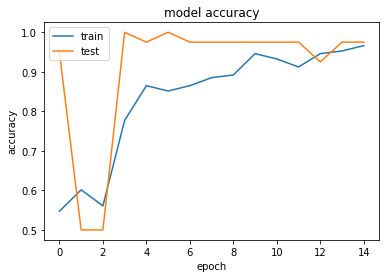

In [43]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

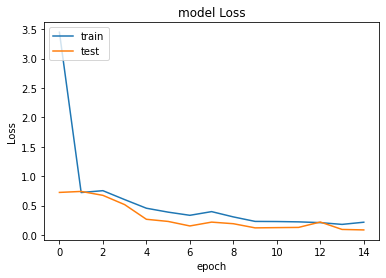

In [44]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()